In [16]:
import librosa
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import concurrent.futures
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import joblib

def get_filepaths(dir_path):
    directory_path = dir_path
    all_files = os.listdir(directory_path)
    mp3_files = [os.path.join(directory_path, file) for file in all_files if file.endswith('.mp3')]

    audio_data_list = []

    for mp3 in mp3_files:
        try:
            y, sr = librosa.load(mp3)
            audio_data_list.append((y, sr))
        except Exception as e:
            print(f"Error loading audio file {mp3}: {str(e)}")

    print('Songs loaded')
    return audio_data_list


def calculate_audio_features(y, sr):
    # Calculate Chroma Short-Time Fourier Transform (STFT)
    chroma_stft_mean = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
    chroma_stft_var = np.var(librosa.feature.chroma_stft(y=y, sr=sr))

    # Calculate Root Mean Square (RMS)
    rms_mean = np.mean(librosa.feature.rms(y=y))
    rms_var = np.var(librosa.feature.rms(y=y))

    # Calculate Spectral Centroid
    spectral_centroid_mean = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spectral_centroid_var = np.var(librosa.feature.spectral_centroid(y=y, sr=sr))

    # Calculate Spectral Bandwidth
    spectral_bandwidth_mean = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    spectral_bandwidth_var = np.var(librosa.feature.spectral_bandwidth(y=y, sr=sr))

    # Calculate Rolloff
    rolloff_mean = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    rolloff_var = np.var(librosa.feature.spectral_rolloff(y=y, sr=sr))

    # Calculate Zero Crossing Rate
    zero_crossing_rate_mean = np.mean(librosa.feature.zero_crossing_rate(y=y))
    zero_crossing_rate_var = np.var(librosa.feature.zero_crossing_rate(y=y))

    # Calculate Harmony
    harmony = librosa.effects.harmonic(y=y)
    harmony_mean = np.mean(harmony)
    harmony_var = np.var(harmony)

    # Calculate Perceptr
    perceptr = librosa.effects.percussive(y=y)
    perceptr_mean = np.mean(perceptr)
    perceptr_var = np.var(perceptr)

    # Calculate Tempo
    tempo = librosa.beat.tempo(y=y, sr=sr)[0]

    # Calculate MFCC features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)  # Calculate 20 MFCCs
    mfcc_means = np.mean(mfccs, axis=1)  # Calculate means of MFCCs
    mfcc_vars = np.var(mfccs, axis=1)

    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

    # Calculate mean and variance for each MFCC coefficient
    mfcc_means = np.mean(mfccs, axis=1)
    mfcc_variances = np.var(mfccs, axis=1)

    # Assign values to individual variables
    mfcc1_mean, mfcc2_mean, mfcc3_mean, mfcc4_mean, mfcc5_mean, \
    mfcc6_mean, mfcc7_mean, mfcc8_mean, mfcc9_mean, mfcc10_mean, \
    mfcc11_mean, mfcc12_mean, mfcc13_mean, mfcc14_mean, mfcc15_mean, \
    mfcc16_mean, mfcc17_mean, mfcc18_mean, mfcc19_mean, mfcc20_mean = mfcc_means

    mfcc1_var, mfcc2_var, mfcc3_var, mfcc4_var, mfcc5_var, \
    mfcc6_var, mfcc7_var, mfcc8_var, mfcc9_var, mfcc10_var, \
    mfcc11_var, mfcc12_var, mfcc13_var, mfcc14_var, mfcc15_var, \
    mfcc16_var, mfcc17_var, mfcc18_var, mfcc19_var, mfcc20_var = mfcc_variances

    return (chroma_stft_mean, chroma_stft_var, rms_mean, rms_var,
            spectral_centroid_mean, spectral_centroid_var,
            spectral_bandwidth_mean, spectral_bandwidth_var,
            rolloff_mean, rolloff_var,
            zero_crossing_rate_mean, zero_crossing_rate_var,
            harmony_mean, harmony_var,
            perceptr_mean, perceptr_var, tempo,
            mfcc1_mean, mfcc1_var,
            mfcc2_mean, mfcc2_var,
            mfcc3_mean, mfcc3_var,
            mfcc4_mean, mfcc4_var,
            mfcc5_mean, mfcc5_var,
            mfcc6_mean, mfcc6_var,
            mfcc7_mean, mfcc7_var,
            mfcc8_mean, mfcc8_var,
            mfcc9_mean, mfcc9_var,
            mfcc10_mean, mfcc10_var,
            mfcc11_mean, mfcc11_var,
            mfcc12_mean, mfcc12_var,
            mfcc13_mean, mfcc13_var,
            mfcc14_mean, mfcc14_var,
            mfcc15_mean, mfcc15_var,
            mfcc16_mean, mfcc16_var,
            mfcc17_mean, mfcc17_var,
            mfcc18_mean, mfcc18_var,
            mfcc19_mean, mfcc19_var,
            mfcc20_mean, mfcc20_var
            )

def calculate_audio_features_wrapper(args):
    return calculate_audio_features(*args)

def extract_feature_matrix(dir_path):
    audio_data_list = get_filepaths(dir_path)

    feature_matrix = []

    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(calculate_audio_features_wrapper, (y, sr)) for y, sr in audio_data_list]

        for future in concurrent.futures.as_completed(futures):
            features = future.result()
            feature_matrix.append(features)
            print('Feature calculated')


    feature_matrix = np.array(feature_matrix)
    print('Feature Calculation finished!')
    return feature_matrix

def preprocessing(feature_matrix):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(feature_matrix)
    pca = PCA()
    pca_result = pca.fit_transform(scaled_data)
    print('Preprocessing finished')
    return pca_result

In [2]:
dir_path = r'C:\Users\Shark\Music\Music\Jungle\Oldschool'
feature_matrix = extract_feature_matrix(dir_path)

Songs loaded


C:\Users\Shark\AppData\Local\Temp\ipykernel_920\434584077.py:66: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)[0]


Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calculated
Feature calc

: 

In [17]:
cache_file = f"feature_matrix_cache.joblib"
feature_matrix = joblib.load(cache_file)

In [31]:
pca_result = preprocessing(feature_matrix)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
cluster_labels = kmeans.fit_predict(pca_result)
print(cluster_labels)

Preprocessing finished
[3 1 1 0 2 1 3 3 1 1 1 2 2 0 2 3 3 1 1 3 1 2 2 2 0 0 3 2 1 2 1 0 2 2 2 3 2
 1 2 1 1 0 3 0 3 1 3 1 1 3 2 2 1 2 2 3 2 2 1 0 3 3 3 2 2 0 3 0 3 3 2 2 1 2
 2 0 2 0 0 1 2 3 0 3 3 2 3 2 2 3 3 1 2 1 2 0 0 3 1 1 3 3 2 2 3 2 2 3 3 3 0
 3 3 3 2 2 2 1 1 0 3 1 2 1 3 1 2 1 1 0 0 3 0 3 1 3 3 3 3 3 3 1 1 1 0 0 1 3
 0 1 2 2 1 1 2 2 3 2 3 1 1 1 1 0 1 2 1 3 3 3 1 3 2 1 3 3 2 0 1 0 0 2 3 1 1
 3 2 1 0 3 2 0 1 1 2 2 0 0 3 1 2 2 0 3 2 0 2 2 1 3 0 2 2 2 2 0 1 0 3 3 1 3
 1 0 3 3 3 2 0 2 3 3 0 2 1 3 1 1 3 2 1 3 1 2 2 3 3 3 3 3 3 3 3 0 3 3 1 3 0
 3 1 0 0 2 2 0 2 1 3 0 0 3 1 3 3 3 3 1 0 3 2 1 1 1 2 0 2 0 1 3 1 1 2 3 1 3
 3 2 2 3 3 1 1 2 1 2 2 1 1 3 1 0 3 0 1 2 1 3 1 1 0 1 0 0 3 2 0 1 1 2 0]


c:\Users\Shark\Music\Programs\KMeans Cluster\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [32]:


silhouette_avg = silhouette_score(pca_result, cluster_labels)
calinski_harabasz_score_avg = calinski_harabasz_score(pca_result, cluster_labels)
davies_bouldin_score_avg = davies_bouldin_score(pca_result, cluster_labels)

print(f"Number of clusters: {n_clusters}")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score_avg}")
print(f"Davies-Bouldin Score: {davies_bouldin_score_avg}")

Number of clusters: 4
Silhouette Score: 0.06736487014715095
Calinski-Harabasz Score: 28.79126831722713
Davies-Bouldin Score: 2.653160018103561


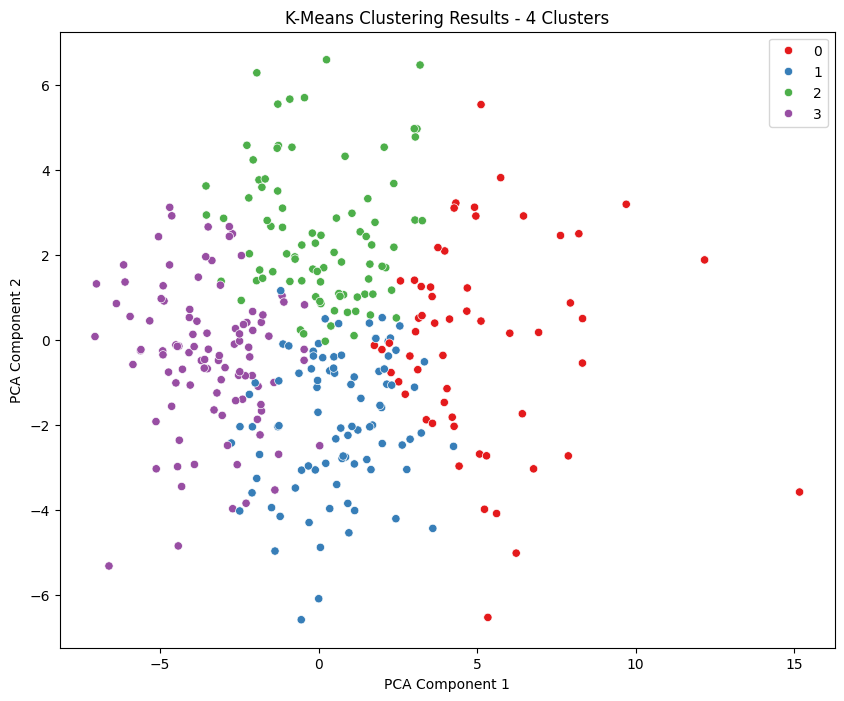

In [33]:
# Your existing code for creating the scatter plot
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=cluster_labels, palette='Set1')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-Means Clustering Results - {n_clusters} Clusters')

# Get the handles and labels of the current legend
handles, labels = scatter.get_legend_handles_labels()

# Save the scatter plot as an image
plt.show()

In [15]:
np.argmax(pca_result[:, 0])

322